In [1]:
from IPython.display import HTML
file_path = 'classificationDigit.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [3]:
from IPython.display import HTML
file_path = 'classificationDigit2.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [4]:
from IPython.display import HTML
file_path = 'Digitexe.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [5]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random

In [84]:
dataset = scipy.io.loadmat('MNIST.mat')
X = dataset['X']
I = dataset['I']

for i in range(10):
    print(X[:,I[0] == i].shape)

print(X)
print(I)

print('X dimensions:', X.shape)
print('I dimensions:', I.shape)

(256, 319)
(256, 252)
(256, 202)
(256, 131)
(256, 122)
(256, 88)
(256, 151)
(256, 166)
(256, 144)
(256, 132)
[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.1645 0.     ... 0.     0.     0.    ]
 [0.     0.086  0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]
[[6 5 4 ... 7 9 8]]
X dimensions: (256, 1707)
I dimensions: (1, 1707)


 - Visualize a bunch of datapoints of X with the function plt.imshow. <br>
  -Extract from X those columns that corresponds to digits 3 or 4. Those digits represents the
classes C1 and C2 defined above.

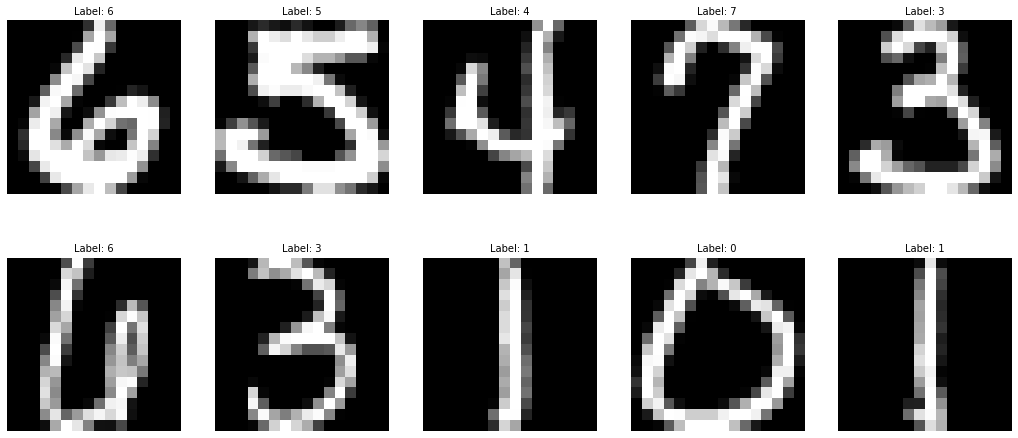

In [7]:
plt.figure(figsize=(18, 8))

for i in range(10):
    plt.subplot(2,5,i+1)
    # reshape the column vector in a matrix 16x16
    image = X[:,i].reshape(16,16)
    plt.imshow(image, cmap='gray')  
    plt.title(f'Label: {I[0][i]}', fontsize=10)  
    plt.axis('off')  

plt.show()


• Extract from X those columns that corresponds to digits 3 or 4. Those digits represents the classes C1 and C2 defined above.

In [8]:
digits_cols = [i for i in range(X.shape[1]) if I[0][i] == 3 or I[0][i] == 4]
print(f'Number of columns for digits 3 and 4: {len(digits_cols)}')

X = X[:,digits_cols]
print(f'Dimensions of X after extraction: {X.shape}')

I = I[:,digits_cols]
print(f'Dimensions of I after extraction: {I.shape}')

Number of columns for digits 3 and 4: 253
Dimensions of X after extraction: (256, 253)
Dimensions of I after extraction: (1, 253)


Split the obtained dataset in training and testing. From now on, we will only consider the training
set. The test set will be only used at the end of the exercise to test the algorithm.

In [9]:
# I'm going to use a 80% of data in the dataset X for the train and 20% for the test.
train_ratio = 0.8

train_size = int(train_ratio * X.shape[1])
indices = np.random.permutation(X.shape[1])

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Creation of train and test sets 
X_train = X[:, train_indices]
I_train = I[:, train_indices]
X_test = X[:, test_indices]
I_test = I[:, test_indices]

print(f'X_train shape: {X_train.shape}')
print(f'I_train shape: {I_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'I_test shape: {I_test.shape}')

X_train shape: (256, 202)
I_train shape: (1, 202)
X_test shape: (256, 51)
I_test shape: (1, 51)


• Create the matrices X1 and X2 defined above from X.

In [10]:
X1 = X_train[:,I_train[0] == 3]
X2 = X_train[:,I_train[0] == 4]

print(f'Dimensions of X1 (digit 3): {X1.shape}')
print(f'Dimensions of X2 (digit 4): {X2.shape}')

Dimensions of X1 (digit 3): (256, 105)
Dimensions of X2 (digit 4): (256, 97)


• Compute the SVD decomposition of X1 and X2 with np.linalg.svd(matrix, full matrices=False) and denote the U-part of the two decompositions as U1 and U2.

In [11]:
U1, S1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, VT2 = np.linalg.svd(X2, full_matrices=False)

print(f'Dimensions of U1: {U1.shape}')
print(f'Dimensions of S1: {S1.shape}')
print(f'Dimensions of V1T: {VT1.shape}')

print(f'Dimensions of U2: {U2.shape}')
print(f'Dimensions of S2: {S2.shape}')
print(f'Dimensions of V2T: {VT2.shape}')

# Important note:
# By using full_matrices=False, we store only the first p columns of the matrix U1, which are the vectors of the orthogonal basis for the original matrix X1.
# As a result, the shape of U1 is 256x106, not 256x256 as it would be in the full matrix form, 106 are the singular values different from zero.

Dimensions of U1: (256, 105)
Dimensions of S1: (105,)
Dimensions of V1T: (105, 105)
Dimensions of U2: (256, 97)
Dimensions of S2: (97,)
Dimensions of V2T: (97, 97)


### Implications of SVD on the MNIST Dataset

- Subspace of R ^256: The column space of X_1 is a subspace of R^256. Each column of X_1 represents a vector in R^256(since each image is flattened into a 256-element vector), and the column space is formed by all possible linear combinations of these columns.

- Dimensionality of Column Space: The dimension of this column space is 106, indicated by the number of linearly independent columns in X_1. This implies that there are 106 independent directions or dimensions in the column space of X_1.

- Orthogonal Basis in U1: The matrix U1, obtained from the SVD of X_1, contains the first 106 columns that form an orthogonal basis for this column space. Each column of U1 is a vector in R^256, and together they represent all the necessary directions to construct any vector in the column space of X_1.

- Practical Implications: This means that although the original images are vectors in a high-dimensional space R^256, their actual variety and the information they carry can be captured and represented in a lower-dimensional subspace (106 dimensions in this case). This allows us to have an efficient representation and dimensionality reduction of data while preserving most of the relevant information.

• Take an unknown digit y from the test set, and compute y⊥1 = U1(UT1y) and y⊥2 = U2(UT2y).

In [20]:
random_idx = random.randint(0,I_test.shape[1] - 1)
print(f'Randomly selected index: {random_idx}')

y = X_test[:,random_idx:random_idx+1]
print(f'The selected image rappresent a : {I_test[0][random_idx]}')


y_ort_1 = U1 @ (U1.T @ y)
y_ort_2 = U2 @ (U2.T @ y)

print(f'Shape of the orthogonal projection onto space of digit 3 (y_ort_1): {y_ort_1.shape}')
print(f"Shape of the orthogonal projection onto space of digit 4 (y_ort_2): {y_ort_2.shape}")

Randomly selected index: 35
The selected image rappresent a : 3
Shape of the orthogonal projection onto space of digit 3 (y_ort_1): (256, 1)
Shape of the orthogonal projection onto space of digit 4 (y_ort_2): (256, 1)


• Compute the distances d1 = ||y − y⊥1||2 and d2 = ||y − y⊥2||2 and classify y to C1 if d1 < d2 and to C2 if d2 < d1.

In [21]:
d1 = np.linalg.norm(y-y_ort_1,2)
d2 = np.linalg.norm(y-y_ort_2,2)
print(f"Distance from y to its projection onto space of digit 3: {d1}")
print(f"Distance from y to its projection onto space of digit 4: {d2}")

if d1 < d2:
    print("Y is a 3!")
else:
    print("Y is a 4!")

Distance from y to its projection onto space of digit 3: 1.2985815617333103
Distance from y to its projection onto space of digit 4: 3.848340655659126
Y is a 3!


Repeat the experiment for different values of y in the test set. Compute the misclassification number for this algorithm.

In [26]:
misclassifications = 0
print(I_test.shape)

for i in range(X_test.shape[1]):
    y = X_test[:, i:i+1]
    y_ort_1 = U1 @ (U1.T @ y)
    y_ort_2 = U2 @ (U2.T @ y)

    dist_to_3 = np.linalg.norm(y - y_ort_1,2)
    dist_to_4 = np.linalg.norm(y - y_ort_2,2)

    if dist_to_3 < dist_to_4:
        classified_digit = 3
    else:
        classified_digit = 4

    if classified_digit != I_test[0][i]:
        misclassifications += 1


print(f"Number of experiment done: {I_test.shape[1]}")
print(f"Number of misclassifications: {misclassifications}")

(1, 51)
Number of experiment done: 51
Number of misclassifications: 0


• Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error

In [52]:
# np.random.seed(0)

def filter_dataset(X, I, digit1, digit2):
    indices = [i for i in range(I.shape[1]) if I[0][i] == digit1 or I[0][i] == digit2]
    return X[:, indices], I[:, indices]

def split_dataset(X, I, train_ratio=0.8):
    num_train = int(train_ratio * X.shape[1])
    indices = np.random.permutation(X.shape[1])
    return X[:, indices[:num_train]], I[:, indices[:num_train]], X[:, indices[num_train:]], I[:, indices[num_train:]]

def calculate_svd(X_train, I_train, digit_label):
    X_digit = X_train[:, I_train[0] == digit_label]
    U, S, VT = np.linalg.svd(X_digit, full_matrices=False)
    return U

def classify_image(y, U1, U2, digit1, digit2):
    y_ort_1 = U1 @ (U1.T @ y)
    y_ort_2 = U2 @ (U2.T @ y)

    dist_to_digit1 = np.linalg.norm(y - y_ort_1)
    dist_to_digit2 = np.linalg.norm(y - y_ort_2)

    if dist_to_digit1 < dist_to_digit2:
        return digit1 
    else:
        return digit2


def calculate_error_rate(X, I, digit1, digit2, train_ratio=0.8):
    X_filtered, I_filtered = filter_dataset(X, I, digit1, digit2)
    X_train, I_train, X_test, I_test = split_dataset(X_filtered, I_filtered, train_ratio)
    
    U1 = calculate_svd(X_train,I_train, digit1)
    U2 = calculate_svd(X_train,I_train, digit2)

    misclassifications = 0
    for i in range(X_test.shape[1]):
        y = X_test[:, i:i+1]
        classified_digit = classify_image(y, U1, U2, digit1, digit2)
        if classified_digit != I_test[0][i]:
            misclassifications += 1

    error_rate = misclassifications / X_test.shape[1]

    return misclassifications,error_rate


In [71]:
dataset = scipy.io.loadmat('MNIST.mat')
X = dataset['X']
I = dataset['I']
digit1 = int(input("Enter the first digit: "))
digit2 = int(input("Enter the second digit: "))
result = calculate_error_rate(X, I, digit1, digit2)
print(f"Misclassifications for digits {digit1} and {digit2}: {result[0]}")
print(f"Error rate for digits {digit1} and {digit2}: {str(result[1] * 100) + ' %'}")

Misclassifications for digits 0 and 2: 35
Error rate for digits 0 and 2: 33.33333333333333 %


In [81]:
import itertools

error_rates = {}
for digit1, digit2 in itertools.combinations(range(10), 2): 
    misclassifications, error_rate = calculate_error_rate(X, I, digit1, digit2)
    error_rates[(digit1, digit2)] = error_rate

sorted_error_rates = sorted(error_rates.items(), key=lambda x: x[1], reverse=True)

print("Top 15 pairs with highest misclassifications rates:")
for (digit1, digit2), error_rate in sorted_error_rates[:15]:
   print(f"Couple {digit1}-{digit2} : Error Rate = {error_rate * 100:.2f} %")

Top 15 pairs with highest misclassifications rates:
Couple 0-8 : Error Rate = 35.48 %
Couple 0-9 : Error Rate = 35.16 %
Couple 0-2 : Error Rate = 33.33 %
Couple 0-3 : Error Rate = 33.33 %
Couple 0-4 : Error Rate = 28.09 %
Couple 0-7 : Error Rate = 27.84 %
Couple 0-6 : Error Rate = 26.60 %
Couple 1-9 : Error Rate = 25.97 %
Couple 0-5 : Error Rate = 24.39 %
Couple 2-5 : Error Rate = 20.69 %
Couple 1-8 : Error Rate = 11.25 %
Couple 5-8 : Error Rate = 10.64 %
Couple 1-4 : Error Rate = 9.33 %
Couple 3-5 : Error Rate = 9.09 %
Couple 1-5 : Error Rate = 8.82 %


- Greater Variability for "0": The larger number of images for the digit "0" in the dataset 319 of 1707 may introduce greater variability in terms of writing styles. This increased variability can make it more challenging for the algorithm to capture a consistent and distinctive representation of this digit.

- Dataset Imbalance: Overrepresentation of a certain digit in the dataset could impact the learning process and subsequent classification. 

- Impact on U Matrices: During SVD, a higher number of images might lead to a more complex or varied U matrix for that digit, affecting the algorithm's ability to accurately distinguish that digit from others.

In [86]:
from IPython.display import HTML
file_path = 'Digitexe2.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [93]:
def filter_dataset(X, I, digits):
    indices = [i for i in range(I.shape[1]) if I[0][i] in digits]
    return X[:, indices], I[:, indices]


def calculate_svd_multiclass(X_train, I_train, digit_labels):
    Us = {}
    for digit in digit_labels:
        Us[digit] = calculate_svd(X_train, I_train, digit)
    return Us


def classify_image_multiclass(y, Us, digits):
    min_dist = np.Inf
    classified_digit = None
    for digit in digits:
        U = Us[digit]
        y_ort = U @ (U.T @ y)
        dist = np.linalg.norm(y - y_ort)
        if dist < min_dist:
            min_dist = dist
            classified_digit = digit
    return classified_digit


def calculate_error_rate_multiclass(X, I, digits, train_ratio=0.8):
    X_filtered, I_filtered = filter_dataset(X, I, digits)
    X_train, I_train, X_test, I_test = split_dataset(X_filtered, I_filtered, train_ratio)

    Us = calculate_svd_multiclass(X_train, I_train, digits)

    misclassifications = 0
    for i in range(X_test.shape[1]):
        y = X_test[:, i:i+1]
        classified_digit = classify_image_multiclass(y, Us, digits)
        if classified_digit != I_test[0][i]:
            misclassifications += 1

    error_rate = misclassifications / X_test.shape[1]

    return misclassifications, error_rate


In [99]:
import itertools

error_rates = {}
for digits in itertools.combinations(range(10), 3): 
    misclassifications, error_rate = calculate_error_rate_multiclass(X, I, digits)
    error_rates[digits] = error_rate

sorted_error_rates = sorted(error_rates.items(), key=lambda x: x[1], reverse=True)

print("Top 15 triples with highest misclassifications rates:")
for digits,error_rate in sorted_error_rates[:15]:
   print(f"Couple {digits} : Error Rate = {error_rate * 100:.2f} %")

Top 15 triples with highest misclassifications rates:
Couple (0, 8, 9) : Error Rate = 57.98 %
Couple (0, 7, 8) : Error Rate = 54.76 %
Couple (0, 2, 7) : Error Rate = 54.35 %
Couple (0, 6, 7) : Error Rate = 50.78 %
Couple (0, 4, 9) : Error Rate = 50.43 %
Couple (0, 2, 9) : Error Rate = 50.38 %
Couple (0, 5, 7) : Error Rate = 49.57 %
Couple (0, 2, 8) : Error Rate = 48.12 %
Couple (0, 3, 8) : Error Rate = 47.90 %
Couple (0, 2, 6) : Error Rate = 47.41 %
Couple (0, 6, 8) : Error Rate = 47.15 %
Couple (0, 4, 5) : Error Rate = 46.23 %
Couple (0, 7, 9) : Error Rate = 45.97 %
Couple (0, 4, 7) : Error Rate = 45.90 %
Couple (0, 2, 3) : Error Rate = 45.80 %
